In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = (11, 6)
# figure resolution in DPI
figure_resolution = 200 

data_dir = './Figure_Data'

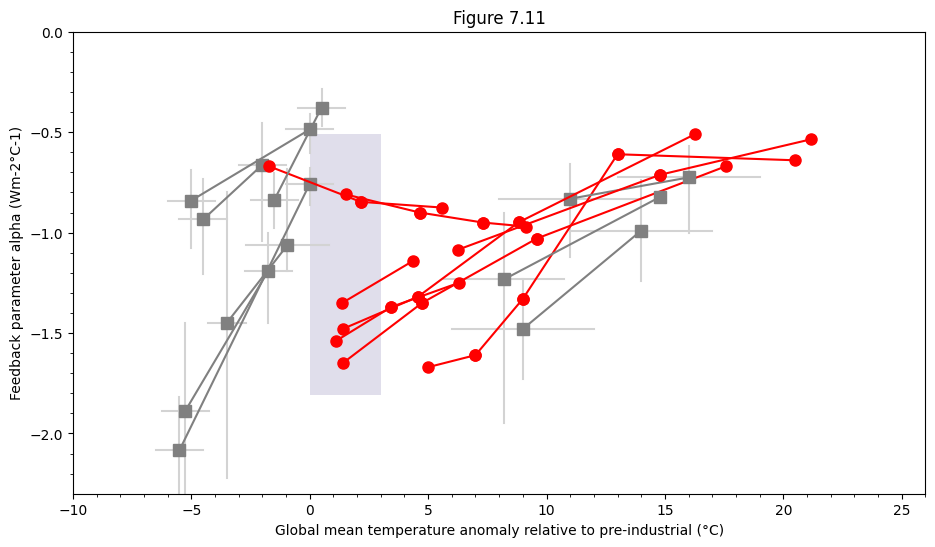

In [97]:
df = pd.read_csv(data_dir + '/Figure7_11.csv', header=2)

fig, ax = plt.subplots(1)

ax.set_xlim(-10,26)
ax.set_ylim(-2.3,0.0)

rect = patches.Rectangle((0, -0.51), 3, -1.3, linewidth=1, edgecolor='none', facecolor=(0.878,0.871,0.922))
ax.add_patch(rect)

ax.set_title('Figure 7.11')
ax.set_xlabel('Global mean temperature anomaly relative to pre-industrial (°C)')
ax.set_ylabel('Feedback parameter alpha (Wm-2°C-1)')

ax.set_xticks(range(-10,26,5))

ax.minorticks_on()

for index, row in df[0:45].iterrows():
    
    if row['paleo (1) or ESM (0)'] == 1:
        marker_color = 'gray'
        marker = 's'
        
    else:
        marker_color = 'red'
        marker = 'o'
        
    # horizontal error bars
    x = [ row['temperature anomaly relative to preindustrial [degreesC]'] - row['lower uncertainty on temp anom [degreesC]'], row['temperature anomaly relative to preindustrial [degreesC]'] + row['upper uncertainty on temp anom [degreesC]'] ]
    y = [ row['Feedback parameter, alpha [W/m2/degreesC]'], row['Feedback parameter, alpha [W/m2/degreesC]']]
    ax.plot(x, y, c = 'lightgray', zorder = 1 )

    # vertical error bars
    x = [ row['temperature anomaly relative to preindustrial [degreesC]'], row['temperature anomaly relative to preindustrial [degreesC]'] ]
    y = [ row['Feedback parameter, alpha [W/m2/degreesC]'] - row['lower uncertainty on alpha [W/m2/degreesC]'], row['Feedback parameter, alpha [W/m2/degreesC]'] + row['upper uncertainty on alpha [W/m2/degreesC]']]
    ax.plot(x, y, c = 'lightgray', zorder = 1 )

    # lines and markers
    if df['study name'][index] == df['study name'][index+1]:
        x = [ df['temperature anomaly relative to preindustrial [degreesC]'][index], df['temperature anomaly relative to preindustrial [degreesC]'][index+1] ]
        y = [ df['Feedback parameter, alpha [W/m2/degreesC]'][index], df['Feedback parameter, alpha [W/m2/degreesC]'][index+1] ]

        ax.plot(x, y, c = marker_color, marker = marker, markersize=8, zorder = 2 )
    
plt.savefig('new_figure_7.11.png', dpi=figure_resolution, bbox_inches='tight')
